# Assignment 1: Recognize a Digit using TensorFlow
Created a neural network to identify handwritten digits (0–9) from the MNIST dataset using TensorFlow and Keras.


In [1]:
# Step 1: Import Required Libraries
import tensorflow as tf                     # TensorFlow – the main library we'll use for building the neural network
from tensorflow.keras.datasets import mnist # MNIST – a ready-made dataset of handwritten digits
from tensorflow.keras.models import Sequential # Sequential – lets us build the model layer-by-layer in order
from tensorflow.keras.layers import Dense, Flatten # Dense = fully connected layer, Flatten = turns 2D images into 1D arrays
from tensorflow.keras.utils import to_categorical # to_categorical – changes number labels into a format the model understands


In [2]:
# Step 2: Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  
# X_train, y_train → images and labels used to train the model
# X_test, y_test → images and labels used to check how well the model works
# Each image is 28x28 pixels in black and white, showing digits from 0 to 9


In [3]:
# Step 3: Normalize the Image Data
X_train = X_train / 255.0  # Turn pixel values (0–255) into 0–1 so the model trains better and faster
X_test = X_test / 255.0    # Scale test images the same way to match the training data format


In [4]:
# Step 4: One-Hot Encode the Labels
y_train = to_categorical(y_train, 10)  # Change each label into a list of 10 values where only the correct digit is 1
y_test = to_categorical(y_test, 10)    # Do the same for the test labels


In [5]:
# Step 5: Create the Model
model = Sequential()  # Start a simple model where we add one layer after another in order


In [6]:
# Step 6: Add Layers to the Model
model.add(Flatten(input_shape=(28, 28)))   # Take the 28x28 image and turn it into a single list of 784 numbers
model.add(Dense(128, activation='relu'))   # Add a hidden layer with 128 neurons; ReLU helps the model learn complex patterns
model.add(Dense(10, activation='softmax')) # Final layer with 10 neurons (one for each digit); Softmax gives probabilities for each digit


c:\Users\joyos\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Step 7: Compile the Model
model.compile(optimizer='adam',               # Use Adam optimizer – it adjusts the learning rate automatically while training
              loss='categorical_crossentropy', # Loss function suited for problems with more than two classes
              metrics=['accuracy'])            # Show accuracy so we can see how well the model is learning


In [9]:
# Step 8: Train the Model
model.fit(X_train, y_train, 
          epochs=5,                     # Go through the entire training data 5 times
          batch_size=32,                 # Train using 32 images at a time before updating the model
          validation_data=(X_test, y_test)) # Check the model’s performance on test data after each round


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8797 - loss: 0.4281 - val_accuracy: 0.9573 - val_loss: 0.1434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9644 - loss: 0.1231 - val_accuracy: 0.9714 - val_loss: 0.0954
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9758 - loss: 0.0797 - val_accuracy: 0.9762 - val_loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9749 - val_loss: 0.0811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9771 - val_loss: 0.0813


In [10]:
# Step 9: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)    # Test the model on data it has never seen before
print(f"Test Accuracy: {test_acc*100:.2f}%")            # Show the accuracy as a percentage


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0967
Test Accuracy: 97.71%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


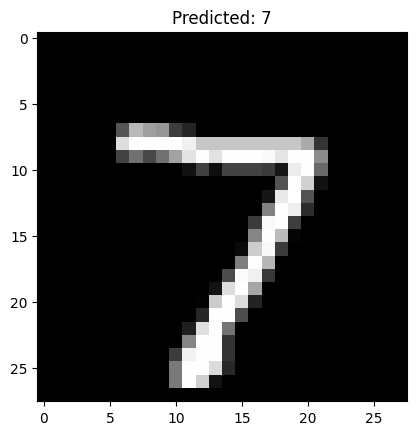

In [11]:
# Step 10: Predict a Single Digit
import matplotlib.pyplot as plt               # Tool to display images
plt.imshow(X_test[0], cmap='gray')            # Show the first test image in black & white
prediction = model.predict(X_test[0].reshape(1, 28, 28))  # Make a prediction (needs reshaping to match input shape)
plt.title("Predicted: " + str(prediction.argmax()))       # Show the predicted number above the image
plt.show()                                    # Actually display the picture


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


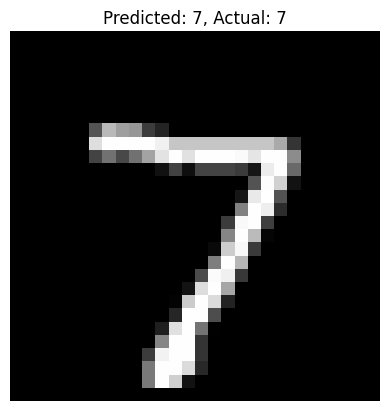

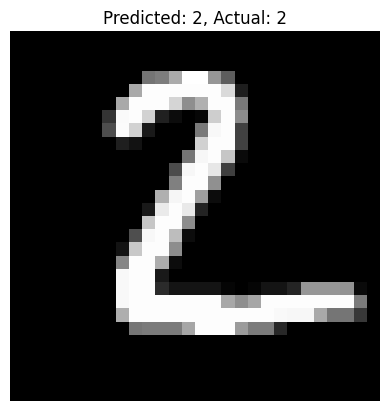

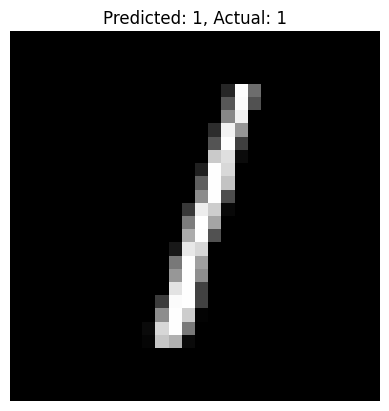

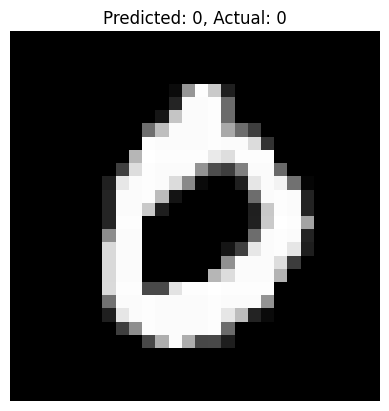

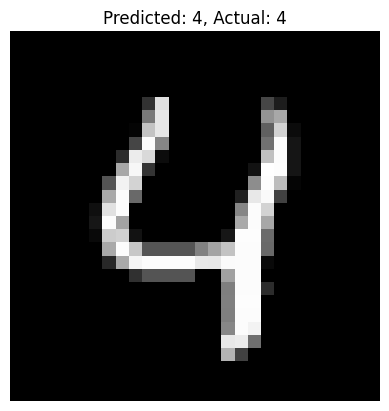

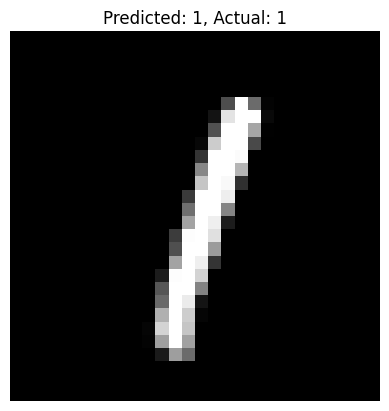

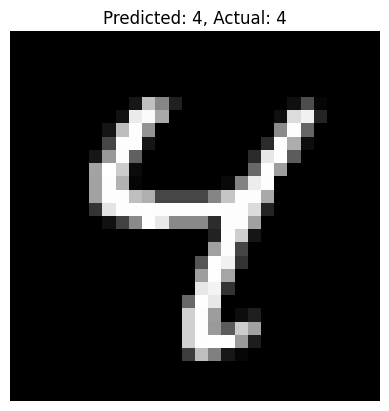

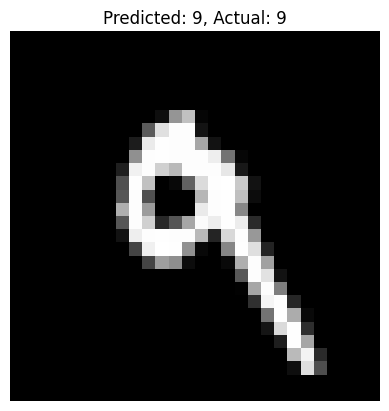

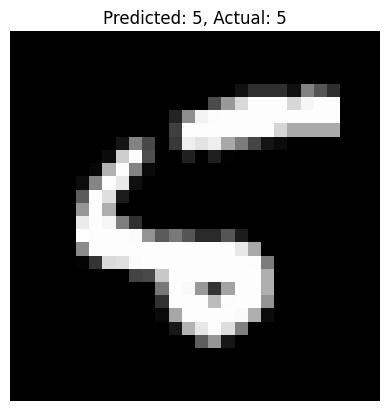

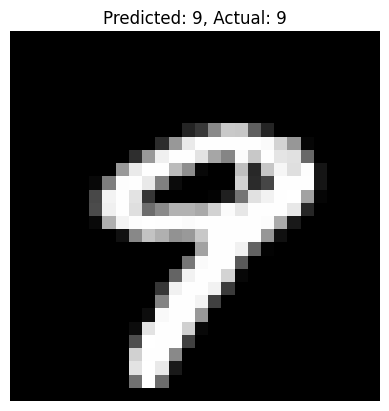

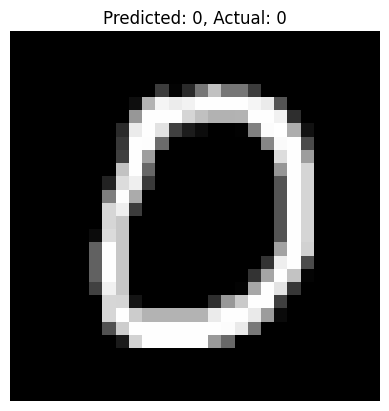

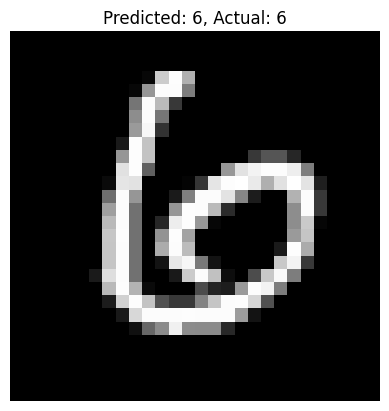

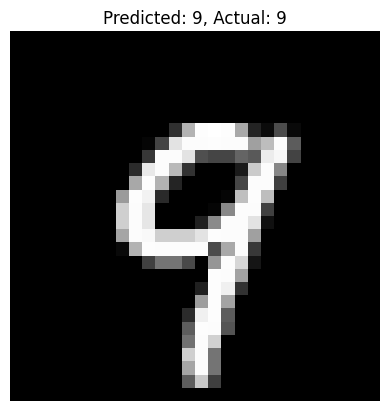

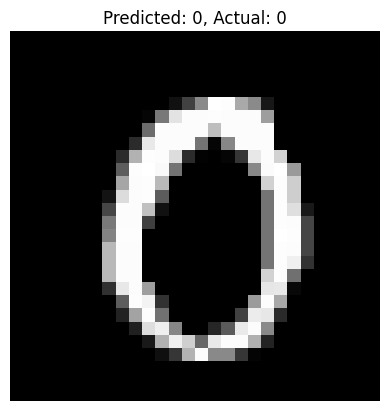

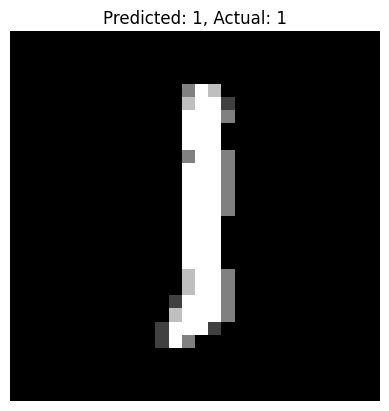

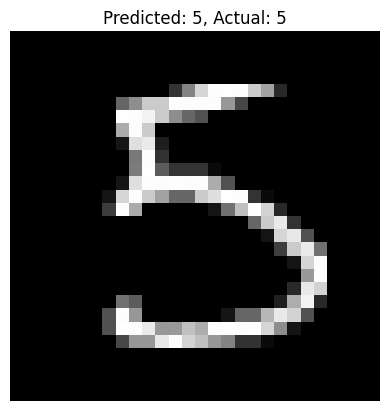

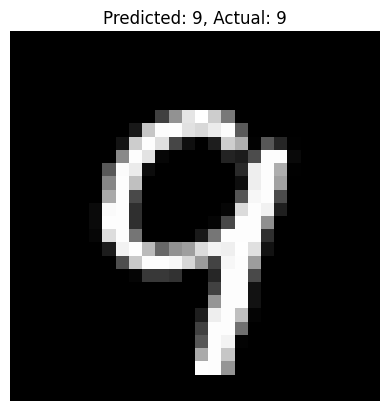

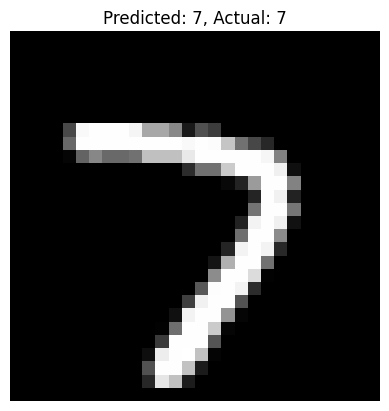

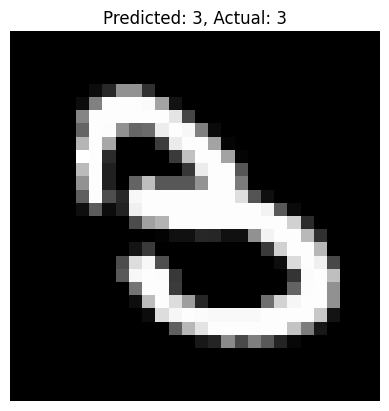

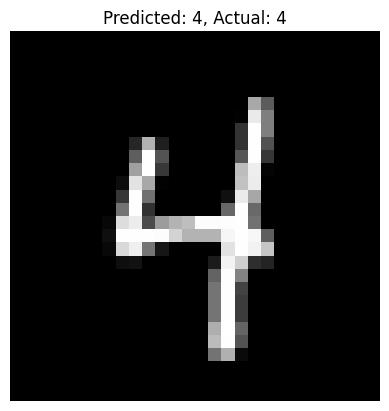

In [12]:
# Step 11: Predict All Digits in the Test Set

import matplotlib.pyplot as plt  # Used to display the images

# Ask the model to guess labels for the entire test set
predictions = model.predict(X_test)  # For each image, it gives a probability for each digit (0–9)

# Show the first 20 images with predictions (instead of all 10,000)
for i in range(20):
    plt.imshow(X_test[i], cmap='gray')               # Show the test image
    predicted_label = predictions[i].argmax()        # The number with the highest probability
    actual_label = y_test[i].argmax()                 # The real label from the dataset
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")  # Show both labels
    plt.axis('off')                                   # Hide axis ticks for a cleaner view
    plt.show()                                        # Display the image
